<a href="https://colab.research.google.com/github/ShmatArtem/TMSds/blob/main/HW21_Shmat_Artem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [75]:
df = pd.read_csv('Orange Quality Data.csv')

In [76]:
df.columns = ['Size', 'Weight', 'Sweetness', 'pH',
       'Softness', 'HarvestTime', 'Ripeness', 'Color',
       'Variety', 'Blemishes', 'Quality']
df.head()

,Size,Weight,Sweetness,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [77]:
# Пронумеруем цвета
enc = LabelEncoder()
enc.fit(df['Color'])
df['Color'] = enc.transform(df['Color'])
df['Color'].unique()

array([2, 0, 1, 3, 4])

In [78]:
#Переведем значения в численный вид
df['Blemishes'] = df['Blemishes'].replace(['N', 'N (Minor)', 'N (Split Skin)'], 0)
df['Blemishes'] = df['Blemishes'].replace(['Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)'], 1)
df['Blemishes'].unique()

array([0, 1])

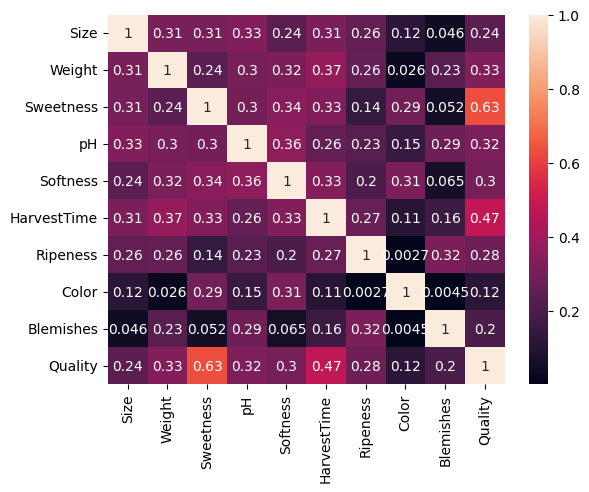

In [79]:
df = df.drop('Variety', axis =1)
corr = df.corr()
sns.heatmap(data =corr.abs(), annot = True)
plt.show()

In [80]:
df.head()

,Size,Weight,Sweetness,pH,Softness,HarvestTime,Ripeness,Color,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,2,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,1,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,2,1,4.5


Предполагал, что Size и Weight будут сильно коррелировать, но нет, поэтому оставим их.

K-means

In [10]:
scaler = StandardScaler()

df_copy = df

df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns = ['Size', 'Weight', 'Sweetness', 'pH',
       'Softness', 'HarvestTime', 'Ripeness', 'Color',
       'Blemishes', 'Quality']
df.head()

,Size,Weight,Sweetness,pH,Softness,HarvestTime,Ripeness,Color,Blemishes,Quality
0,-0.318168,-0.445988,0.396454,-0.651937,-0.812044,-1.005949,0.332927,0.470591,-0.772028,0.180354
1,0.327740,0.263940,-0.148068,-0.175898,-0.054974,-0.253049,0.748654,-1.138097,-0.772028,0.674277
2,-0.964075,-0.978434,1.122482,-1.127977,-1.569115,-1.570623,1.164382,-0.333753,-0.772028,1.168200
3,1.065920,0.796386,-0.874096,0.776182,0.702096,1.064525,-0.082800,1.274935,-0.772028,-0.313569
4,0.604557,0.086458,0.214947,-0.413918,-0.433509,-0.629499,1.164382,0.470591,1.295291,0.674277


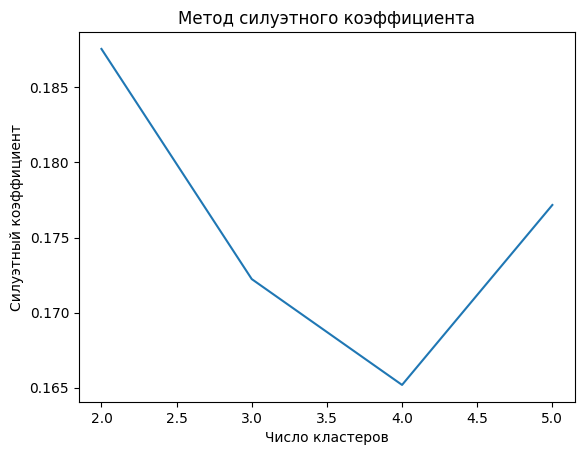

In [11]:
silhouette_coefficients = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 6), silhouette_coefficients)
plt.title('Метод силуэтного коэффициента')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()

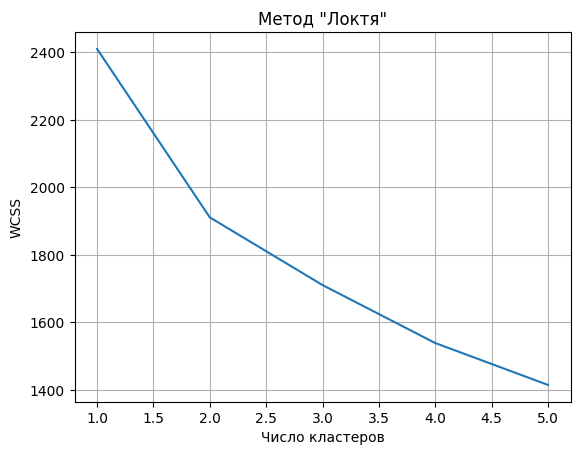

In [12]:
wcss = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.grid()
plt.show()

По первому методу количество кластеров должно быть 2, так как это максимум. По методу локтя сказать наверняка сложно, поэтому возьмём два кластера, так на этом графике тоже видно перелом.

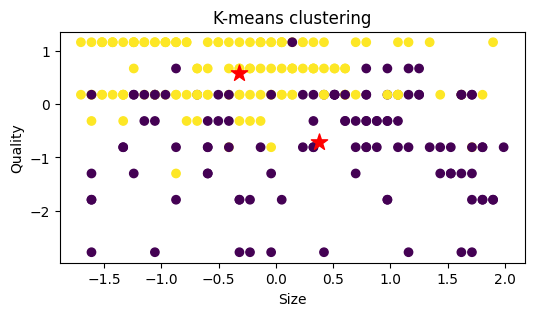

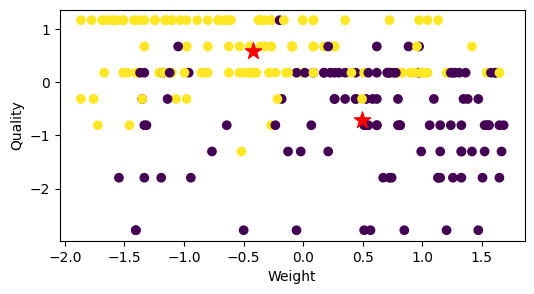

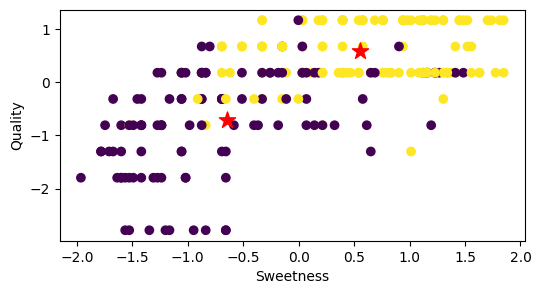

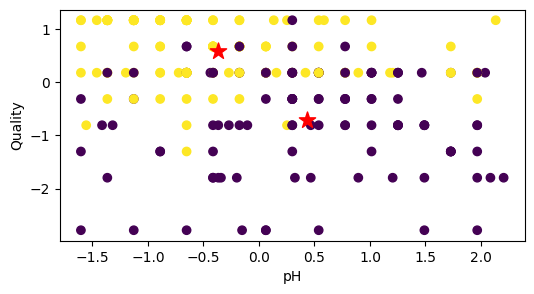

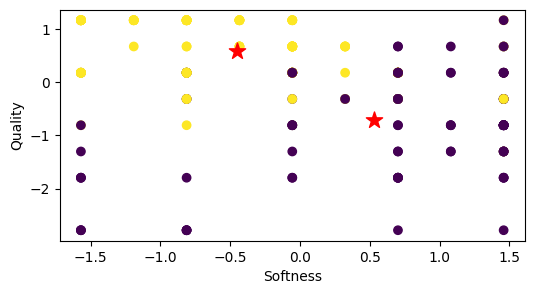

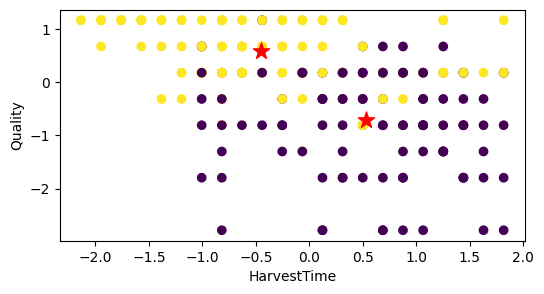

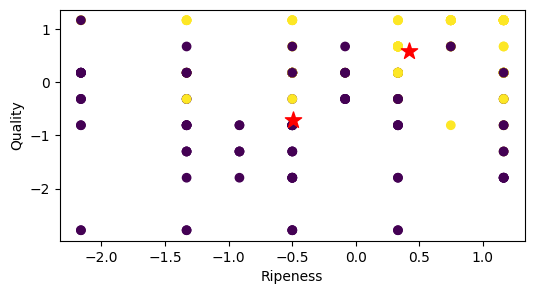

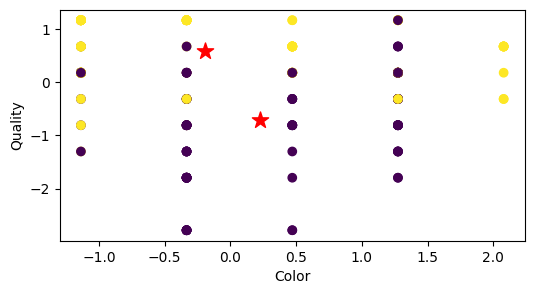

In [31]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df)
kmeans_labels = kmeans.labels_

for i in range(df.shape[1]-2):
  plt.figure(figsize = (6,3))
  plt.scatter(df.iloc[:,i], df.iloc[:,9], c = kmeans.labels_)
  plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,9], marker='*', s=150, c='red')
  plt.xlabel(df.columns[i])
  plt.ylabel('Quality')
  if i == 0:
    plt.title('K-means clustering')
  plt.show()

DBSCAN

In [ ]:
pip install optuna

In [15]:
import optuna

def objective(trial):

  eps = trial.suggest_float('eps', 0.5 ,3)
  min_samples = trial.suggest_int('min_samples',1,15)

  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  cluster = dbscan.fit_predict(df)

  try:
    db_score = davies_bouldin_score(df, cluster)
  except:
    db_score = 100

  return db_score

optuna.logging.disable_default_handler() # Скрываем лог

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 200)

best = study.best_params

Подбор параметров приводит только к крайностям: либо каждая точка - кластер, либо наоборот все точки - это выбросы. Так что буду подбирать параметры вручную.

Количество кластеров: 2
Количество выбросов (фиолетовые точки): 53


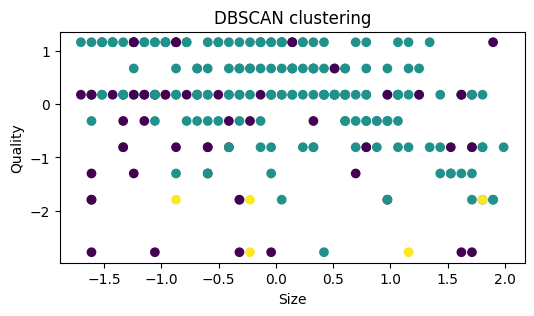

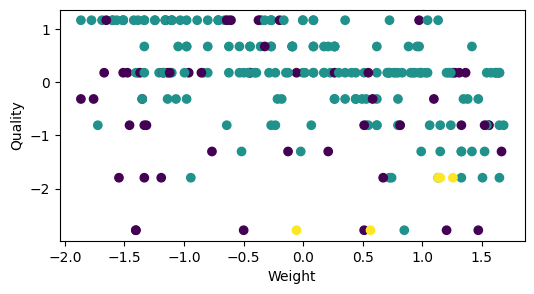

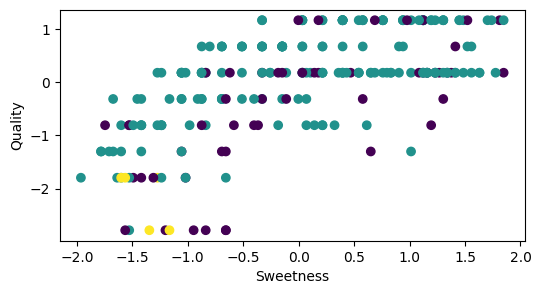

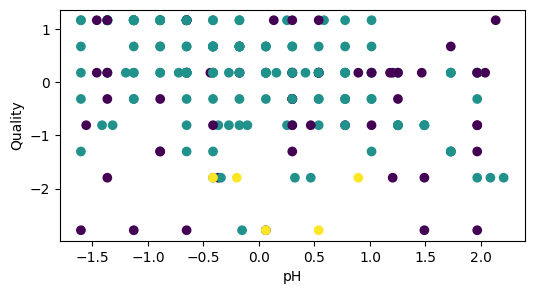

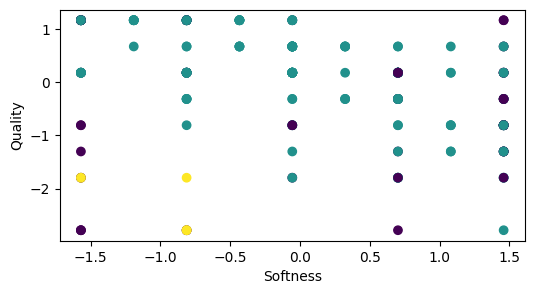

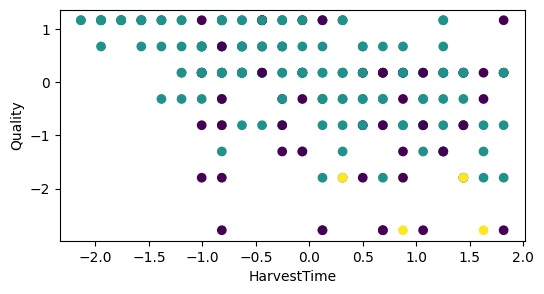

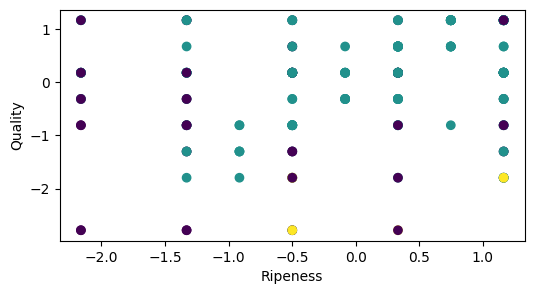

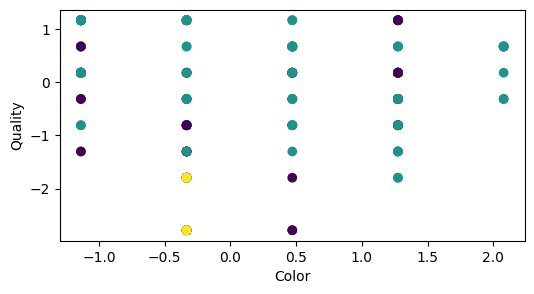

In [33]:
dbscan = DBSCAN(eps= 2.3, min_samples= 3)
dbscan_labels = dbscan.fit_predict(df)

print(f'Количество кластеров: {len(set(dbscan_labels))-1}\nКоличество выбросов (фиолетовые точки): {list(dbscan_labels).count(-1)}')

for i in range(df.shape[1]-2):
  plt.figure(figsize = (6,3))
  plt.scatter(df.iloc[:,i], df.iloc[:,9], c = dbscan_labels)
  plt.xlabel(df.columns[i])
  plt.ylabel('Quality')
  if i == 0:
    plt.title('DBSCAN clustering')
  plt.show()

В целом, даже визуально понятно, что кластеризация DBSCAN-ом вышла не очень качесвтенной.

Агломеративная кластеризация

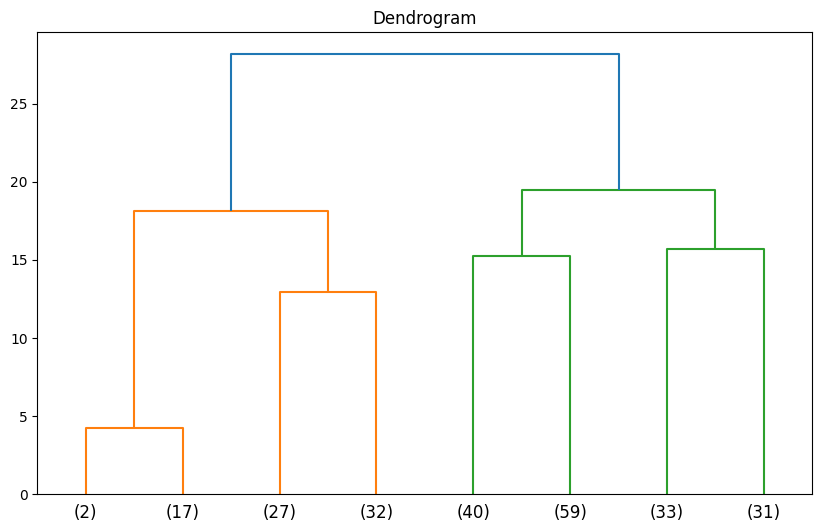

In [27]:
aggl = AgglomerativeClustering(n_clusters=2)
aggl_labels = aggl.fit_predict(df)

plt.figure(figsize=(10,6))
dendrogram(linkage(df, method='ward'), truncate_mode='level', p=2)
plt.title('Dendrogram')
plt.show()

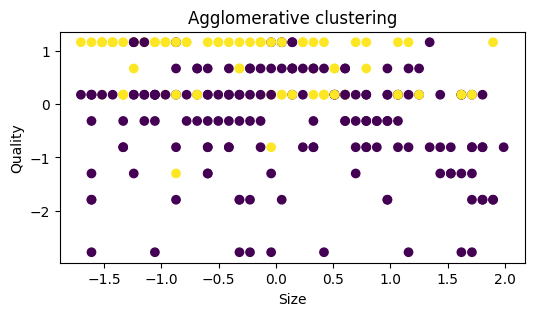

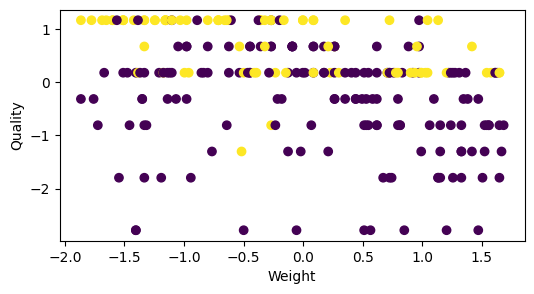

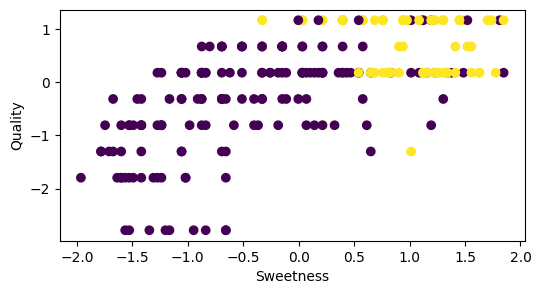

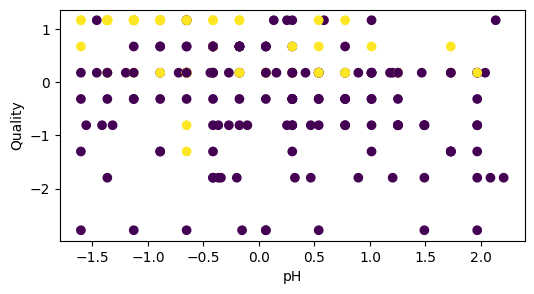

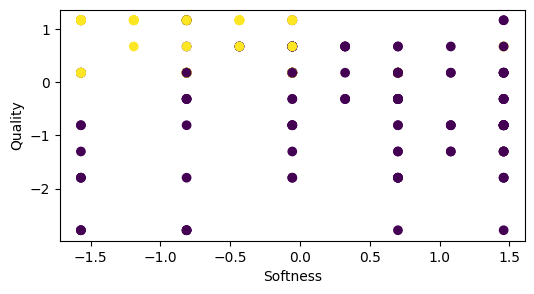

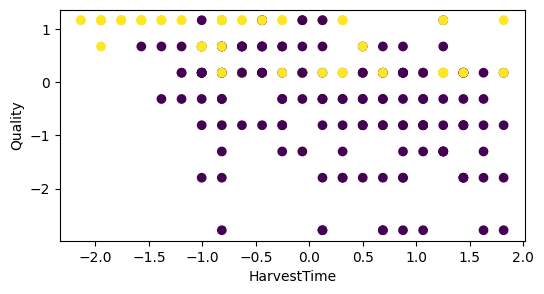

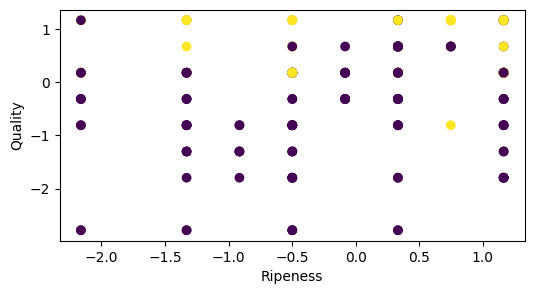

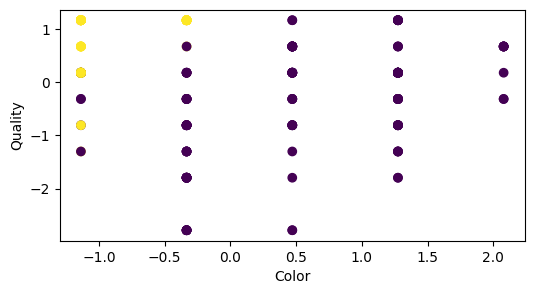

In [29]:
for i in range(df.shape[1]-2):
  plt.figure(figsize = (6,3))
  plt.scatter(df.iloc[:,i], df.iloc[:,9], c = aggl_labels)
  plt.xlabel(df.columns[i])
  plt.ylabel('Quality')
  if i == 0:
    plt.title('Agglomerative clustering')
  plt.show()

Метрики качества кластеризации

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Silhouette_score

---


Оценка варьируется от –1 до 1, где более высокое значение указывает на лучшую производительность кластеризации. Значение, близкое к 1, предполагает, что точки данных хорошо кластеризованы и правильно разделены, а значение, близкое к -1, указывает на то, что точки данных могли быть отнесены к неправильным кластерам.

In [51]:
sil_score = []

sil_score.append(silhouette_score(df, kmeans_labels))
sil_score.append(silhouette_score(df, dbscan_labels))
sil_score.append(silhouette_score(df, aggl_labels))

Calinski_harabasz_score

---
Измеряет отношение дисперсии между кластерами к дисперсии внутри кластера. Более высокое значение индекса Калински-Харабаша указывает на лучшую производительность кластеризации с более высоким разделением между кластерами и меньшей дисперсией внутри кластеров.


In [52]:
cal_har_score = []

cal_har_score.append(calinski_harabasz_score(df, kmeans_labels))
cal_har_score.append(calinski_harabasz_score(df, dbscan_labels))
cal_har_score.append(calinski_harabasz_score(df, aggl_labels))

Davies_bouldin_score


---


Показывает среднее «сходство» кластеров: расстояние между ними сравнивается с их размером. Чем меньше значение, тем лучше произведено разделение на кластеры.

In [56]:
bould_score = []

bould_score.append(davies_bouldin_score(df, kmeans_labels))
bould_score.append(davies_bouldin_score(df, dbscan_labels))
bould_score.append(davies_bouldin_score(df, aggl_labels))

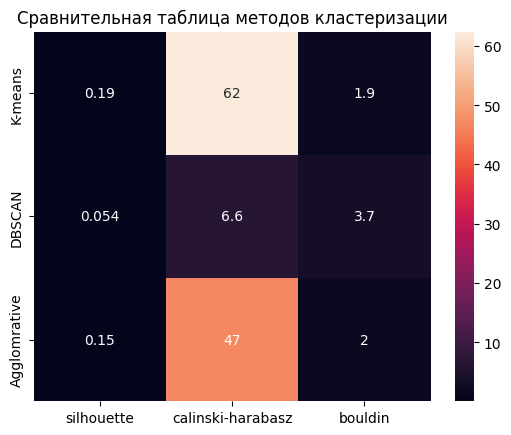

In [57]:
scores = {
    'silhouette' : sil_score,
    'calinski-harabasz' : cal_har_score,
    'bouldin' : bould_score
}

scores = pd.DataFrame(scores, index = ['K-means', 'DBSCAN', 'Agglomrative'])

sns.heatmap(data = scores, annot= True)
plt.title('Сравнительная таблица методов кластеризации')
plt.show()

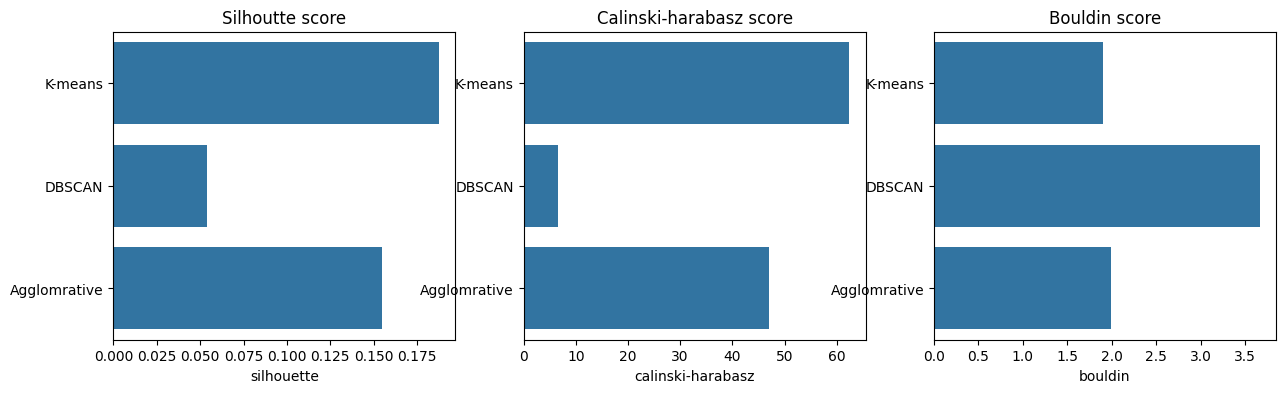

In [72]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
sns.barplot(scores['silhouette'], orient = 'y')
plt.title('Silhoutte score')

plt.subplot(1,3,2)
sns.barplot(scores['calinski-harabasz'], orient = 'y')
plt.title('Calinski-harabasz score')

plt.subplot(1,3,3)
sns.barplot(scores['bouldin'], orient = 'y')
plt.title('Bouldin score')

plt.show()

Исходя из полученных метрик, можно сделать вывод, что лучше всего кластеризировать эти данные получилось с помощью метода k-means (все показатели лучше, чем у других моделей). Хуже всего на этих данный себя проявил DBSCAN. Полагаю, что это связанно с тем, что данные не находились в разрозненных группках, а были распределены почти что равномерно на плоскости, что может быть сложно для этого метода.